# **Advanced Machine Learning**

Yurag, Marivient Alexia R.

BSCS - IS - 3B

March 27, 2024

Assessment 7

**Assessment Task: Netflix Userbase Analysis**

**Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

**Part 1: Data Preprocessing**

In [ ]:
#Load the Dataset

data = pd.read_csv('Netflix_Userbase.csv')
#statistics = df.describe()
data.head()
#print(statistics)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
#Select Features and Target Variable
features = ['Subscription Type', 'Monthly Revenue', 'Country', 'Gender', 'Device', 'Plan Duration']
target = ['Age']

In [ ]:
# Separating X and y
X = data[features]
y = data[target]

# Handling missing values and encoding categorical variables
numeric_features = ['Join Date', 'Last Payment Date', 'Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


**Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Visualizations
# Distribution of Monthly Revenue
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

# Visualizing Monthly Revenue by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Revenue')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# User Age Distribution by Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Gender', bins=20, kde=True, multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

plt.tight_layout()
plt.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
X = pd.DataFrame(data, columns=['Age'])
y = data['Monthly Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
# Build the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Model Evaluation
# R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: -0.006933994071707472
Root Mean Squared Error (RMSE): 1.667725628911762


**Part 4:  Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
# Assuming X contains features and data is your DataFrame
X = pd.DataFrame(data, columns=['Age', 'Gender', 'Subscription Type'])

# Perform one-hot encoding for 'Gender' and 'Subscription Type'
X_encoded = pd.get_dummies(X, columns=['Gender', 'Subscription Type'])

# Generate synthetic feedback variable
np.random.seed(42)  # For reproducibility
n_samples = X_encoded.shape[0]
feedback = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Assuming equal probability for positive and negative feedback

# Add the synthetic feedback variable to your DataFrame
X_encoded['Feedback'] = feedback

# Split the data into features (X) and target variable (y)
X = X_encoded.drop(columns=['Feedback'])
y = X_encoded['Feedback']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.498
Precision: 0.5198412698412699
Recall: 0.5019157088122606
F1-score: 0.5107212475633528
Confusion Matrix:
 [[118 121]
 [130 131]]


**Part 5: Comparative Analysis and Visualization**

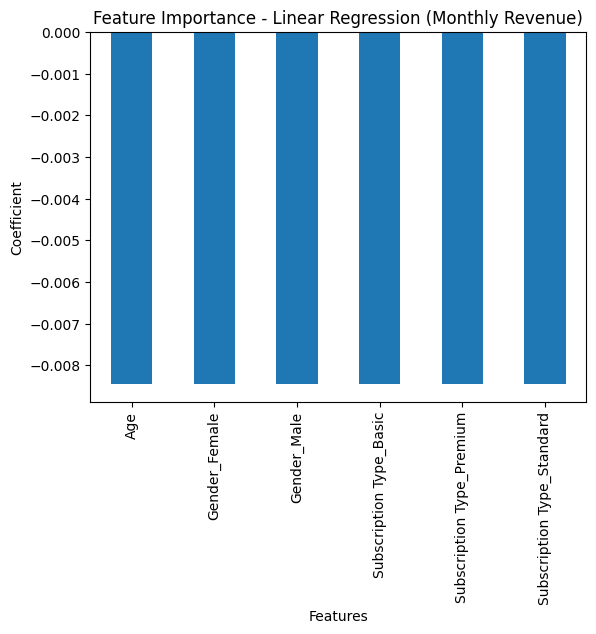

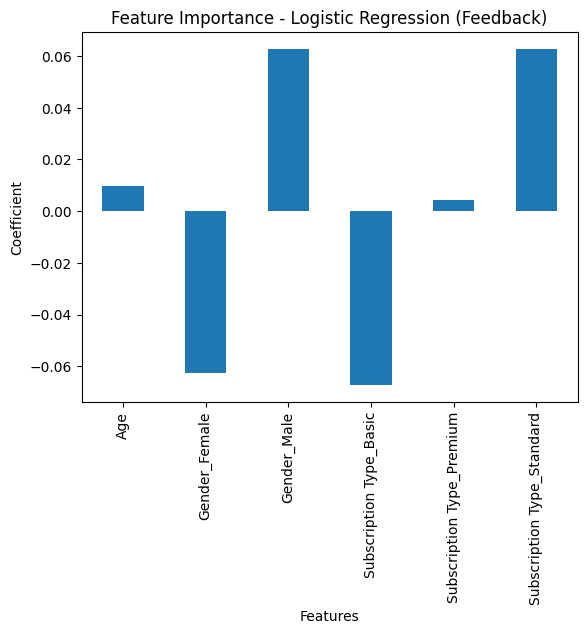

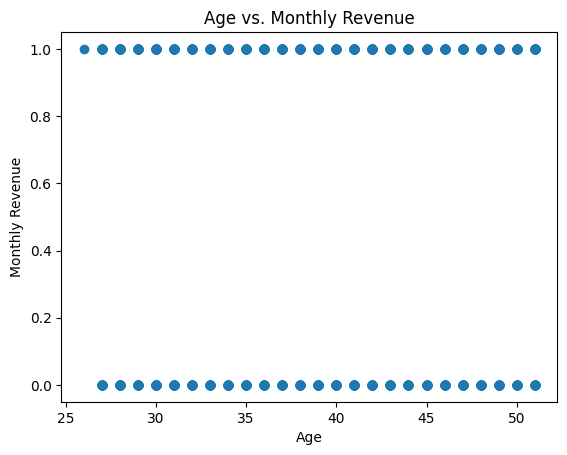

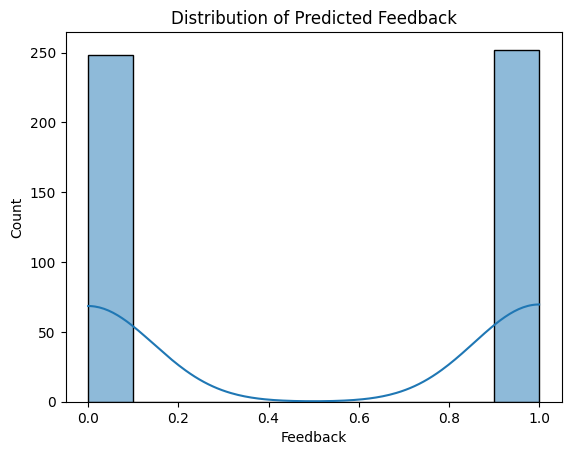

In [ ]:
# Feature Importance
# Linear Regression
linear_coefficients = linear_regression_model.coef_
linear_feature_importance = pd.Series(linear_coefficients[0], index=X.columns)
linear_feature_importance.plot(kind='bar')
plt.title('Feature Importance - Linear Regression (Monthly Revenue)')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

# Logistic Regression
logistic_coefficients = logistic_regression_model.coef_[0]
logistic_feature_importance = pd.Series(logistic_coefficients, index=X.columns)
logistic_feature_importance.plot(kind='bar')
plt.title('Feature Importance - Logistic Regression (Feedback)')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

# Insights
#Scatter plot for linear regression
plt.scatter(X['Age'], y)  # Assuming 'Age' is a feature
plt.title('Age vs. Monthly Revenue')
plt.xlabel('Age')
plt.ylabel('Monthly Revenue')
plt.show()

#Distribution of Predicted feedback
sns.histplot(y_pred, kde=True)
plt.title('Distribution of Predicted Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()